In [106]:
import pandas as pd


In [107]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [108]:
df.shape


(7043, 21)

In [109]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [60]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [61]:
df.dropna(inplace=True)


In [62]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

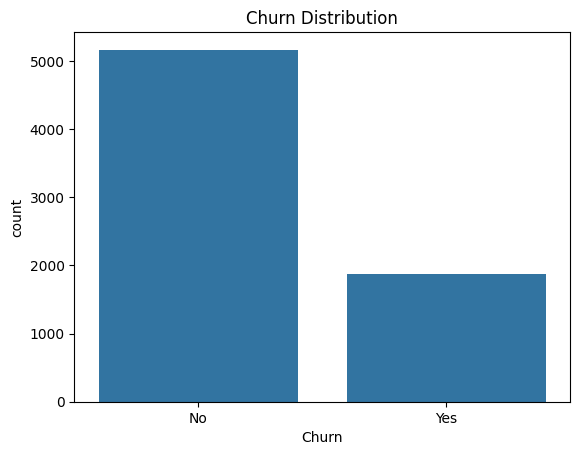

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


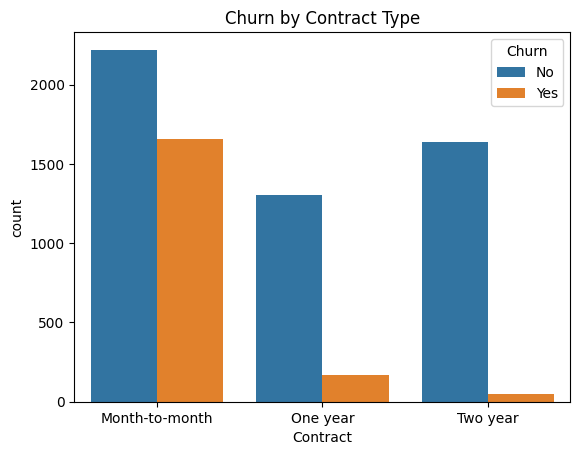

In [65]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


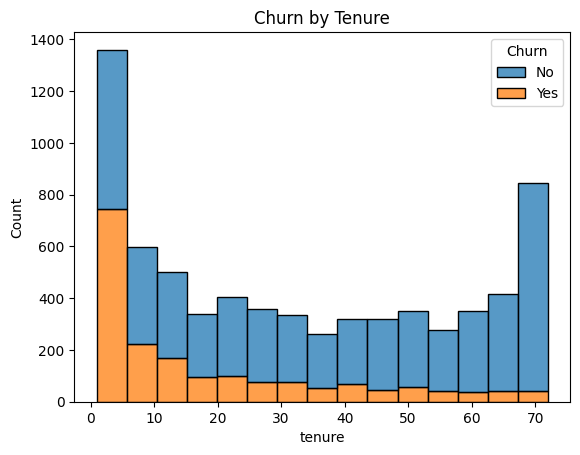

In [66]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Churn by Tenure')
plt.show()


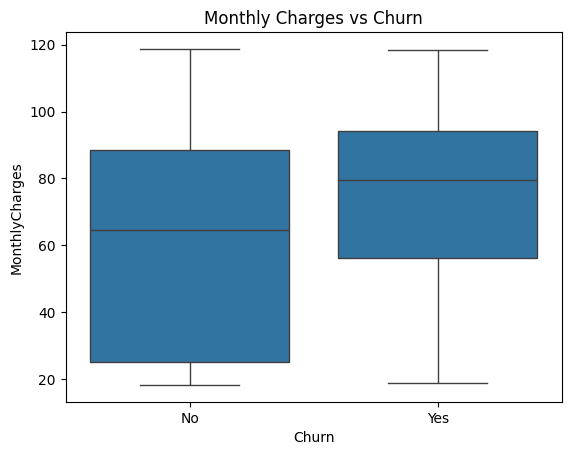

In [67]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


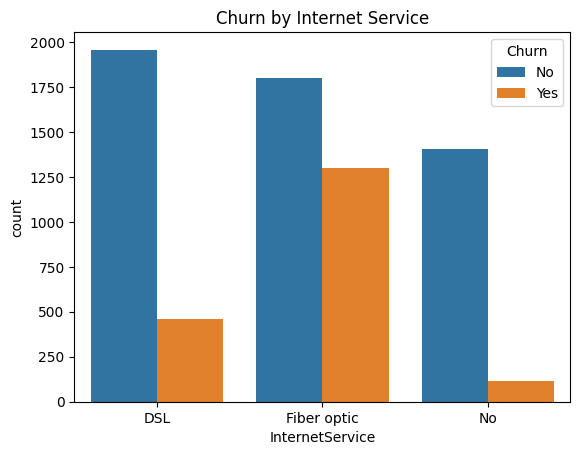

In [68]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()


In [69]:
df.drop('customerID', axis=1, inplace=True)


In [70]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [71]:
df.select_dtypes(include='object').columns


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [94]:
df = pd.get_dummies(df, drop_first=True)


In [95]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [96]:
from sklearn.model_selection import train_test_split


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [98]:
X_train.shape, X_test.shape


((5625, 30), (1407, 30))

In [99]:
from sklearn.linear_model import LogisticRegression


In [100]:
log_model = LogisticRegression(max_iter=1000)


In [101]:
from sklearn.preprocessing import StandardScaler


In [102]:
scaler = StandardScaler()


In [103]:
X_train_scaled = scaler.fit_transform(X_train)


In [104]:
X_test_scaled = scaler.transform(X_test)


In [105]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [84]:
y_pred_log = log_model.predict(X_test_scaled)


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred_log)
confusion_matrix(y_test, y_pred_log)


array([[915, 118],
       [181, 193]])

In [86]:
from sklearn.ensemble import RandomForestClassifier


In [87]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


In [88]:
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [89]:
y_pred_rf = rf_model.predict(X_test)


In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [91]:
accuracy_score(y_test, y_pred_rf)


0.7853589196872779

In [92]:
confusion_matrix(y_test, y_pred_rf)


array([[927, 106],
       [196, 178]])

In [93]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


TotalCharges                      0.193409
MonthlyCharges                    0.169758
tenure                            0.167572
InternetService_Fiber optic       0.039999
PaymentMethod_Electronic check    0.035016
OnlineSecurity_Yes                0.028905
Contract_Two year                 0.028618
gender_Male                       0.026971
TechSupport_Yes                   0.025829
PaperlessBilling_Yes              0.025044
dtype: float64